[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mayo-Radiology-Informatics-Lab/MIDeL-Chapters/blob/main/chapters/Section_14_Image_Image_multimodality_registration.ipynb)

#Multimodal deep learning using PyTorch
##SIIM Github Repo
###Task
Train a multi modal deep learning model to classify MGMT promoter methylation status using different MRI sequences and age.

Requirements
Basic understanding of machine learning and deep learning
Programming in Python
Programming in PyTorch
Learning objectives
At the end of this activity, you will be able to:

- Define multimodality and state its importance
- Categorize different types of multimodality
- Implement Imaging-Imaging multimodality deep leaning in PyTorch
- Implement Imaging-Non imaging multimodality deep leaning in PyTorch
- Implement multimodal deep leaning with result ensemble in PyTorch

###Acknowledgements
This Jupyter Notebook was based on code by Shahriar Faghani, MD (Faghani.shahriar@mayo.edu), Gian Marco Conte, MD, PhD (Gianmarco.conte@mayo.edu) and, Mana Moassefi, MD (Moassefi.mana@mayo.edu) developed at Artificial intelligence lab, Mayo Clinic, Rochester


## Please make a copy of this notebook for yourself and work with the copied version of the notebook


#14. Multimodal Deep Learning Models



####Similar to human physicians, automated detection and classification systems that use both medical imaging data and clinical data from the EHR -- such as patient demographics, previous diagnoses, and laboratory data -- are likely to produce models with better performance. Recent medical imaging literature also shows a similar trend where both EHR and pixel data are exploited in a "fusion paradigm" for solving complex tasks that cannot easily be solved by one modality alone (Huang et al. 2020).

###14-A imaging - imaging models:

####Contemporary medicine relies on the synthesis of a wide variety of information such as imaging data, laboratory data, unstructured narrative data, 1D signals like EKG, and in some cases, audio or observational data. The clinical context of images often plays a critical role in providing diagnosis decisions in medical image interpretation. For example, it has repeatedly been shown that a lack of access to clinical and laboratory data during image interpretation results in lower performance and decreased clinical utility for the referring provider. In a survey of radiologists, the majority (87%) stated that clinical information had a significant impact on interpretation (Boonn and Langlotz 2009). Radiology is not the only imaging-based medical specialty that relies on context for accurate interpretation of imaging data; pathology, ophthalmology, and dermatology also use clinical context for clinical image interpretation. With accurate and relevant information regarding current symptoms and past medical history, physicians are better able to interpret imaging findings in the appropriate clinical context, resulting in a more relevant differential diagnosis, a more useful report for physicians, and a more favorable outcome for the patient. 
####Convolutional neural network (CNN) models typically use pixel values as inputs, without contextualizing other clinical information as doctors do in clinical practice, which may limit performance. As an example consider the “simple” task in radiology of identifying pneumonia on a chest x-ray (CXR), something that has been achieved by many investigators training deep learning models for automated detection and classification of pathologies. Such applications, however, may ultimately have a limited impact on clinical practice without clinical context such as chief complaint, history of present illness, past medical history, drug history, family history, physical examination findings, and laboratory values. In spite of having imaging findings that can set pneumonia apart from other diagnoses, CXR is nonspecific, and accurate diagnosis requires clinical and laboratory information. CXR findings that suggest pneumonia would be accurate in patients with fevers and elevated white blood cell counts, but in patients with no similar clinical features or laboratory values, similar images might indicate atelectasis, pulmonary edema, interstitial disease, or even lung cancer. 

####First, we will discuss different fusion techniques in deep learning and machine learning, and then we will discuss some medical multimodality examples, and finally, we will develop a simple multimodal model.


###Fusion Techniques

####Image fusion is a technique for combining the information from several imaging data sources acquired from the same or different modalities. A goal of image fusion, especially in medical imaging, is to enhance or complement each data source's features, so that machine learning algorithms can achieve better performance rather than using only one data channel. The expected output will have a richer feature representation than the individual components. The multimodal fusion technique has achieved remarkable success in a variety of applications like medical image segmentation, image classification, and image reconstruction.
####Data fusion requires more than one data source (e.g. could be from one exam like T1 and T2 of MRI or different exams like MRI and CT). The traditional image processing literature refers to these as ‘channels’ and we will also use that nomenclature. Data channels can be heterogeneous, complementary, concordant or discordant, synchronous or asynchronous, and redundant with different scales that must be normalized in order to be combined. Medical images such as MRI/CT/PET/Ultrasound also have differences that must be considered when using them in combination. Therefore, the choice of algorithm or architecture depends primarily on the goal of the application and data channel characteristics. To summarize, the advantages of data fusion (Bellot et al. 2002) are:
####1) To provide different types of information to help increase certainty about the diagnosis.
####2) To combine source features and extract the new or hidden information with increased certainty.
####3) To enhance the abstraction and completeness of data by efficiently combining them.
####In recent computer vision publications, people investigate the multimodal fusion strategies in the context of the spatio-temporal convolutional neural network (Karpathy et al. 2014) and broadly categorized into four fusion patterns/classes: Early fusion, Late fusion, Joint fusion, and Slow fusion.    	


###Early Fusion:

####Early fusion merges the various data channels at the beginning of the machine learning model training. These individual modality features may be joined in different ways, such as by average pooling, weighted concatenation, or gated fusion techniques (Type I or II in Fig. 1). The unimodal local features are concatenated into a joint representation. Therefore, the unified model must ensure that the data/features are correctly aligned in order to enable joint processing. As a result, converting data sources into a single feature vector is a significant challenge in early data fusion approaches. In reality, the conditionally independent criteria between medical data sources are not always true as multiple modalities may have highly correlated features, possibly because of acquisition setting. Therefore, different data collection modalities are typically spatially aligned (known as image registration) with a standard pixel sampling rate (for images or perhaps time for other modalities) to make a common ground for fusion. If the data is aligned correctly, the cross-correlations between data items may be exploited, which provides an opportunity to increase the system performance (Gadzicki et al. 2020).


<img src="https://i.ibb.co/WchcPN1/fig1.png"><br>
*Figure 1.* **Early Fusion**<br><br>


###Late or Ensemble Fusion:
####In late fusion, the individual streams fully process each data channel separately and their outputs are merged at a decision-making or prediction stage through a summation, averaging operation, or majority voting. Similar to the ensemble technique, the late fusion process learns the optimal combination of each component that maximizes performance. The learning process handles the errors independently, decorrelates errors, and thus improves performance with respect to each modality. The major drawback lies in the limited potential for the exploitation of cross-correlations between the different unimodal data.
<img src="https://i.ibb.co/T2JHW4X/fig2.png"><br>
*Figure 2.* **Late Fusion** <br><br>
###Intermediate/Joint Fusion
####Joint fusion was introduced to fuse the imaging feature representations with the clinical features before feeding them into the model. Because of the differences between the imaging and clinical features in dimensionality and dynamic range, different models were introduced (Haylat 2020) to scale their clinical features before fusion and improve their performance (Fig. 3).
<img src="https://i.ibb.co/kKxVYfz/fig3.png"><br>
*Figure 3.* **Joint Fusion, Type I (Up) and Type II (down)** <br><br>
###Slow Fusion
####Slow fusion is widely used in 3D video both the spatial and temporal dimensions (Huang et al. 2020) begin as multiple networks that take consecutive video frames and slowly fuse their temporal features throughout the network such that the higher layers progressively get access to global information(Karpathy et al. 2014). As shown in Fig. 4, the whole architecture is segregated into four layers of actions that progressively share the training parameters. In the first layer, each model takes four temporal sequences (stride of four) that pass through a series of convolutions, producing four feature maps. The second layer processes a series of two temporal features out of four feature maps and passes it to layer three, consequently accessing information across all the input video frames. Finally, layer four performs a pooling operation for global feature extraction and eventually connects higher tasks (classification) with a dense connection. Therefore, the machine learning or CNN models benefit from learning the powerful features with subsequent fusion connections and can be robust to details of the connectivity across time.
<img src="https://i.ibb.co/St6Ccz9/fig4.png"><br>



###Imaging Only Multimodal Learning:

####As we discussed before, multimodality can be derived from a variety of sources; this section discusses image-image learning, while sections 14-B and 14-C consider imaging-tabular data learning, and imaging-text learning, respectively.

####Multimodal imaging studies usually require co-registration. The process of co-registering images includes geometrically aligning two or more images so that their corresponding pixels (voxels) represent the same object. In general, image co-registration can be classified into two categories based on the reference: one approach registers the images into an existing atlas; the other approach registers the images into one selected image. It is essential that this process is undertaken before any subsequent quantitative image analysis. Various techniques are available for doing image registration, including DL-based registration and traditional registration, which are beyond the scope of this chapter (for further reading see (Haskins, Kruger, and Yan 2020)). 
####Multimodal imaging has many real-world examples, one of which is the fusion of structural and functional (molecular) imaging such as PET-CT and PET-MR. Since molecular imaging has a limited spatial resolution, it cannot precisely show the location of tumors, and tracers often are not taken up by enough structures to make anatomic location clear. By acquiring CT or MR images within the same physical device, the precise anatomic location can be determined(Fig. 5).
<img src="https://i.ibb.co/vZf4V1b/fig5.png"><br>
*Figure 5.* **(a) Coregistered PET-CT scan , (b) CT scan,(c) PET scan**<br><br>
####CT-MRI fusion for radiation therapy is another example. MRI has superb soft-tissue resolution and can show tumor which is difficult to appreciate on CT. On the other hand, MRI does not reflect radiation attenuation, which is critical to accurate dose delivery. As a result,fusion of MRI images with CT is commonly used in radiosurgery, interventional radiology, and radiotherapy. (Liu et al. 2019) (Fig. 6)
<img src="https://i.ibb.co/qjyf2Z6/fig6.png"><br>
*Figure 6.* **(a) CT scan, (b) Coregistered CT-MRI scan,(c) MRI scan	**<br><br>
####While we used different modalities in the above examples, there are also times when planes or modes of acquisition of the same modality can yield different types of information that can be utilized. For instance, using both the mediolateral oblique (MLO) and the craniocaudal (CC) mammogram views increases the accuracy of diagnostic imaging for detecting breast cancers, compared to only using one. (Fig. 7)


#### In this notebook we are going to train a model to determine MGMT promoter methylation status within patients with GBM tumor.
##### We are going to use T1,T2,T1 post contrast,FLAIR MRI sequences and also mask of tumor.

### Import Packages

In [ ]:
!pip install monai wandb -q

     |████████████████████████████████| 1.8 MB 16.2 MB/s 
     |████████████████████████████████| 145 kB 75.9 MB/s 
     |████████████████████████████████| 181 kB 62.1 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 


In [ ]:
import os

import math
import shutil
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

import monai as mn
import nibabel as nib

import torch
from torch.utils.data import Dataset,DataLoader,WeightedRandomSampler
import wandb

### Select one GPU if there are many / Set up WANDB environment

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES']='1'
os.environ['WANDB_API_KEY']=#Enter your WAND API KEY here.Under setting menu of your wandb profile
os.environ['WANDB_SILENT']='true'

### Make Training Proccess Deterministic

In [ ]:
def seed_all(seed:int) -> None:
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    mn.utils.misc.set_determinism(seed=seed)
seed_all(123)

### Set up some Hyperparameters

In [ ]:
#Hyperparameter
bs=2
lr=1e-5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs=3

### Load Labels(MGMT methylation status) for each patient

### To download the dataset click on the links below and [make a shortcut](https://support.google.com/drive/answer/9700156?hl=en&co=GENIE.Platform%3DDesktop) of them in your google drive.
Link to the NIfTI files:https://drive.google.com/drive/folders/1-vASO92VQ-KLSsoBakgySID0fGbdBRQb?usp=sharing 

Link to the CSV file:https://drive.google.com/file/d/1-HqrqZKPrJfw0GqrcD55_x-C3BrffTPW/view?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train_labels.csv')# csv path
df.head(3)

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0


### Splitting dataset to train and validation sets at patients level

In [ ]:
df_train,df_val=train_test_split(df, test_size=0.19, train_size=0.81, random_state=123 ,shuffle=True, stratify=df['MGMT_value'])

In [ ]:
print('Number of positive train samples:',len(df_train[df_train['MGMT_value']==1]))
print('Number of negative train samples:',len(df_train[df_train['MGMT_value']==0]))
print('Number of positive validation samples:',len(df_val[df_val['MGMT_value']==1]))
print('Number of negative validation samples:',len(df_val[df_val['MGMT_value']==0]))
print('Ratio of positive to negative samples in train set:',len(df_train[df_train['MGMT_value']==1])/len(df_train[df_train['MGMT_value']==0]))
print('Ratio of positive to negative samples in validation set:',len(df_val[df_val['MGMT_value']==1])/len(df_val[df_val['MGMT_value']==0]))

Number of positive train samples: 248
Number of negative train samples: 225
Number of positive validation samples: 59
Number of negative validation samples: 53
Ratio of positive to negative samples in train set: 1.1022222222222222
Ratio of positive to negative samples in validation set: 1.1132075471698113


Number of Total positive samples:307
Number of Total Negative samples:278


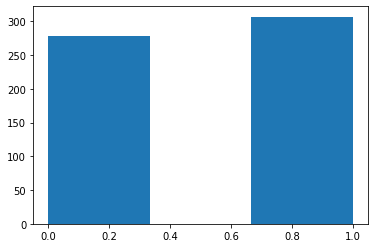

In [ ]:
df['MGMT_value'].hist(grid=False,bins=3)
len_neg=len(df[df['MGMT_value']==0])
len_pos=len(df[df['MGMT_value']==1])
print(f'Number of Total positive samples:{len_pos}\nNumber of Total Negative samples:{len_neg}')

### Retrieve image paths

In [ ]:
list_0=os.listdir('/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData')

In [ ]:
def path_maker_list(patient_list:list,path:str):
    path_list=[]
    for item in patient_list:
        path_patient=os.path.join(path,item)
        path_list.append(path_patient)
    return path_list

In [ ]:
path_list_0=path_maker_list(list_0,'/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData')
len(path_list_0)

1250

In [ ]:
path_list_0[0]

'/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_01487'

##### Create List of Dictionaries that for each patient contain: Paths of different MRI sequences and Label

In [ ]:
train_list=[]
val_list=[]
for i,idx in enumerate(path_list_0):
    data_dict={}
    id_num=int(idx.split('/')[-1].split('_')[1])
    df_selected=df.loc[lambda df: df['BraTS21ID'] == id_num]
    idx_str=idx.split('/')[-1].split('_')[1]
    try:
      label=list(df_selected['MGMT_value'])[0]
      data_dict['img_t1']=f'{idx}/BraTS2021_{idx_str}_t1.nii.gz'
      data_dict['img_t2']=f'{idx}/BraTS2021_{idx_str}_t2.nii.gz'
      data_dict['img_t1c']=f'{idx}/BraTS2021_{idx_str}_t1ce.nii.gz'
      data_dict['img_flair']=f'{idx}/BraTS2021_{idx_str}_flair.nii.gz'
      data_dict['seg']=f'{idx}/BraTS2021_{idx_str}_seg.nii.gz'
      data_dict['label']=label
    except:
      pass
    if id_num in list(df_train['BraTS21ID']):
        train_list.append(data_dict)
    elif id_num in list(df_val['BraTS21ID']):
        val_list.append(data_dict)
print(f'Number of train samples:{len(train_list)}')
print(f'Number of validation samples:{len(val_list)}')
print(f'Each dictionary would be like:\n{train_list[0]}')

Number of train samples:467
Number of validation samples:109
Each dictionary would be like:
{'img_t1': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00395/BraTS2021_00395_t1.nii.gz', 'img_t2': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00395/BraTS2021_00395_t2.nii.gz', 'img_t1c': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00395/BraTS2021_00395_t1ce.nii.gz', 'img_flair': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00395/BraTS2021_00395_flair.nii.gz', 'seg': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00395/BraTS2021_00395_seg.nii.gz', 'label': 0}


### Transformations

In [ ]:
####In the current notebook we just use post contrast T1 and the T2, but you can use other sequnces as well by modifying 'keys' argument in transformations

mri_to_use=["img_t1c",'img_t2']
train_transforms=mn.transforms.Compose([
    mn.transforms.LoadImageD(keys=mri_to_use),
    mn.transforms.AddChannelD(keys=mri_to_use),
    mn.transforms.SpacingD(keys=mri_to_use,pixdim=(1,1,1), meta_key_postfix='meta_dict'),
    mn.transforms.Resized(keys=mri_to_use, spatial_size=(240,240,155)),

    ###QUESTION TIME!###  Complete the next function
    mn.transforms.NormalizeIntensityD(keys=mri_to_use,channel_wise=##Your code here##),
    #channel_wise (bool) – if True, calculate on each channel separately, otherwise, calculate on the entire image directly. default to False.
    #''' https://docs.monai.io/en/stable/transforms.html#normalizeintensityd '''

    ###QUESTION TIME AGAIN!###  
    mn.transforms.ConcatItemsd(keys=mri_to_use, name="img"),
    #'''What would be the shape og ''img'' ? '''

    mn.transforms.RandAffineD(
        keys="img",
        translate_range=(15,15,10),
        scale_range=(0.05,0.05,0.05),
        rotate_range=(math.pi/12,math.pi/12,math.pi/15),
        padding_mode='zeros',
        prob=0.5,
        as_tensor_output=False),
    mn.transforms.ToTensord(keys=["img","label"]),
    
])
val_transforms=mn.transforms.Compose([
    mn.transforms.LoadImageD(keys=mri_to_use),
    mn.transforms.AddChannelD(keys=mri_to_use),
    mn.transforms.SpacingD(keys=mri_to_use,pixdim=(1,1,1), meta_key_postfix='meta_dict'),
    mn.transforms.Resized(keys=mri_to_use, spatial_size=(240,240,155)),

    ###QUESTION TIME! Last time :) ###  
    mn.transforms.NormalizeIntensityD(keys=mri_to_use,channel_wise=##Your code here##),
    #channel_wise (bool) – if True, calculate on each channel separately, otherwise, calculate on the entire image directly. default to False.
    #''' https://docs.monai.io/en/stable/transforms.html#normalizeintensityd '''
  
    mn.transforms.ConcatItemsd(keys=mri_to_use, name="img"),
    mn.transforms.ToTensord(keys=["img","label"]),
    
])

### Create Dataloader/Dataset/Sampler

In [ ]:
'''Creating Dataset'''
train_ds = mn.data.Dataset(data=train_list, transform=train_transforms)
val_ds = mn.data.Dataset(data=val_list, transform=val_transforms)

In [ ]:
for data in train_ds[:2]:
    print(data['img'].shape)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([2, 240, 240, 155])
torch.Size([2, 240, 240, 155])


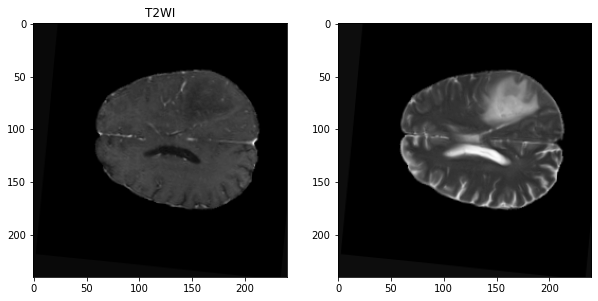

In [ ]:
sample_img=train_ds[0]['img']
fig,axes=plt.subplots(1,2,figsize=(10,10));
axes[0].imshow(sample_img[0,:,:,100],cmap='gray');
axes[0].title.set_text('T1C')
axes[1].imshow(sample_img[1,:,:,100],cmap='gray');
axes[0].title.set_text('T2WI')

In [ ]:
'''Sampler'''
class_weights=[1.1,1]
sample_weights=[0]*len(train_ds)
for idx,data in enumerate(train_ds):
    class_weight=class_weights[data['label']]
    sample_weights[idx]=class_weight
sampler= WeightedRandomSampler(sample_weights,num_samples=len(sample_weights),replacement=True)

In [ ]:
"""How make batch in dataloader"""
def collater(data):
    batch_imgs = [s['img'] for s in data]
    batch_labels = [s['label'] for s in data]
    imgs = torch.stack(batch_imgs, axis=0)
    targets = torch.stack(batch_labels, axis=0)
    targets=targets.squeeze(-1)
    return {'imgs': imgs, 'targets': targets}

In [ ]:
"""Creating train and validation dataloader"""
train_loader = DataLoader(train_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),,sampler=sampler,collate_fn=collater,prefetch_factor=1)
val_loader = DataLoader(val_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),collate_fn=collater,prefetch_factor=1)

### Create model

In [ ]:
model = mn.networks.nets.DenseNet121(spatial_dims=3, in_channels=2, out_channels=2).to(device)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr)

### Training and evaluation on Validation set



In [ ]:
val_interval = 1
best_metric = -1
best_metric_epoch = -1
wandb.init(project='SIIM_early_fusion', entity='Define your entity here')#Define your wandb entity 
config = wandb.config
config.learning_rate = lr
config.batch_size=bs
config.mode='3D'
config.backbone='DenseNet121'
config.optimizer='Adam'
config.sampler='True'
config.resample='True'
config.registration='True'
config.normalization='Per patient'
config.epochs=epochs
config.augmentation='Affine'
wandb.run.name=f'BraTS_3D_Densenet121_{lr}_bs{bs}_2Channel(1c_seg)_normalization_pp'
wandb.watch(model)

for i,epoch in enumerate(tqdm(range(epochs))):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epochs}")
    model.train()
    epoch_loss = 0
    val_epoch_loss=0
    step = 0
    val_step=0
    for batch_data in tqdm(train_loader):
        step += 1
        inputs, labels = batch_data["imgs"].to(device), batch_data["targets"].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = (len(train_ds) // train_loader.batch_size)+1
        print(f"{step}/{epoch_len}, train_loss: {loss.item():.4f}")
        wandb.log({"loss": loss})
    epoch_loss /= step
    wandb.log({'epoch_loss':epoch_loss})
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    
    model.eval()
    with torch.no_grad():
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        for val_data in val_loader:
            val_step +=1
            val_images, val_labels = val_data["imgs"].to(device), val_data["targets"].to(device)
            val_output=model(val_images)
            val_loss= loss_function(val_output,val_labels)
            val_epoch_loss += val_loss.item()
            val_epoch_len = len(val_ds) // val_loader.batch_size
            total_val_step=(len(val_ds)//bs)+1
            print(f"{val_step}/{total_val_step}, val_loss: {val_loss.item():.4f}")
            wandb.log({'val_loss':val_loss})
            y_pred = torch.cat([y_pred, model(val_images)], dim=0)
            y = torch.cat([y, val_labels], dim=0)
            

        val_epoch_loss /= val_step
        print(f"epoch {epoch + 1} average val_loss: {val_epoch_loss:.4f}")
        wandb.log({'val_epoch_loss':val_epoch_loss})

        acc_value_val = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_val = acc_value_val.sum().item() / len(acc_value_val)
        if acc_metric_val > best_metric:
            best_metric = acc_metric_val
            best_metric_epoch = epoch + 1
            ##torch.save(model.state_dict(), "best_metric_model_classification3d_multimodal_early.pth") Specify Directory
            print("saved new best metric model")
        print(f"current epoch: {epoch + 1} current accuracy: {acc_metric_val:.4f} best accuracy: { best_metric:.4f}")
        wandb.log({"loss": loss,
                    'Accuracy_val':acc_metric_val,})
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        
        step = 0
        train_step=0
        for train_data in train_loader:
            train_step +=1
            train_images, train_labels = train_data["imgs"].to(device), train_data["targets"].to(device)
            train_output=model(train_images)
            train_epoch_len = len(train_ds) // train_loader.batch_size
            total_train_step=(len(train_ds)//bs)+1
            y_pred = torch.cat([y_pred, model(train_images)], dim=0)
            y = torch.cat([y, train_labels], dim=0)
            

        acc_value_train = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_train = acc_value_train.sum().item() / len(acc_value_train)
        wandb.log({'Accuracy_train':acc_metric_train})

print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

##Intermediate Fusion: Adding Age!
###In this section we will add the age of the patient after extracting features from MRI, and then we will train another neural net (while simultaneously training the first neural net).
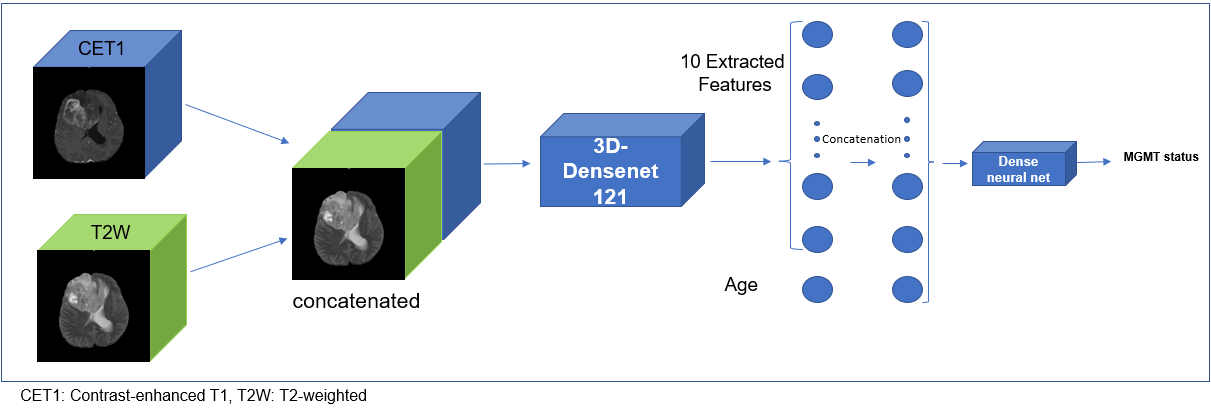

Create List of dictionaries....

In [ ]:
train_list=[]
val_list=[]
for i,idx in enumerate(path_list_0):
    data_dict={}
    id_num=int(idx.split('/')[-1].split('_')[1])
    df_selected=df.loc[lambda df: df['BraTS21ID'] == id_num]
    idx_str=idx.split('/')[-1].split('_')[1]
    try:
      label=list(df_selected['MGMT_value'])[0]
      data_dict['img_t1']=f'{idx}/BraTS2021_{idx_str}_t1.nii.gz'
      data_dict['img_t2']=f'{idx}/BraTS2021_{idx_str}_t2.nii.gz'
      data_dict['img_t1c']=f'{idx}/BraTS2021_{idx_str}_t1ce.nii.gz'
      data_dict['img_flair']=f'{idx}/BraTS2021_{idx_str}_flair.nii.gz'
      data_dict['seg']=f'{idx}/BraTS2021_{idx_str}_seg.nii.gz'
      data_dict['age']=torch.randint(low=40, high=90,size=(1,))# Since BraTS2021 dataset doesn't contain age of the patients, here we are generating random age for the patients!
      data_dict['label']=label
    except:
      pass
    if id_num in list(df_train['BraTS21ID']):
        train_list.append(data_dict)
    elif id_num in list(df_val['BraTS21ID']):
        val_list.append(data_dict)
print(f'Number of train samples:{len(train_list)}')
print(f'Number of validation samples:{len(val_list)}')
print(f'Each dictionary would be like:\n{train_list[0]}')

Number of train samples:24
Number of validation samples:6
Each dictionary would be like:
{'img_t1': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00160/BraTS2021_00160_t1.nii.gz', 'img_t2': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00160/BraTS2021_00160_t2.nii.gz', 'img_t1c': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00160/BraTS2021_00160_t1ce.nii.gz', 'img_flair': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00160/BraTS2021_00160_flair.nii.gz', 'seg': '/content/drive/MyDrive/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/BraTS2021_00160/BraTS2021_00160_seg.nii.gz', 'age': tensor([51]), 'label': 1}


In [ ]:
'''Creating Dataset'''
train_ds = mn.data.Dataset(data=train_list, transform=train_transforms)
val_ds = mn.data.Dataset(data=val_list, transform=val_transforms)

In [ ]:
'''Sampler'''
class_weights=[1.1,1]
sample_weights=[0]*len(train_ds)
for idx,data in enumerate(train_ds):
    class_weight=class_weights[data['label']]
    sample_weights[idx]=class_weight
sampler= WeightedRandomSampler(sample_weights,num_samples=len(sample_weights),replacement=True)

In [ ]:
"""How make batch in dataloader"""
def collater(data):
    batch_imgs = [s['img'] for s in data]
    batch_labels = [s['label'] for s in data]
    batch_ages=[s['age'] for s in data]
    imgs = torch.stack(batch_imgs, axis=0)
    targets = torch.stack(batch_labels, axis=0)
    ages=torch.stack(batch_ages, axis=0)
    targets=targets.squeeze(-1)
    ages=ages.squeeze(-1)
    return {'imgs': imgs, 'targets': targets, 'ages':ages}

In [ ]:
"""Creating train and validation dataloader"""
train_loader = DataLoader(train_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),sampler=sampler,collate_fn=collater,prefetch_factor=1)
val_loader = DataLoader(val_ds, batch_size=bs, num_workers=2, pin_memory=torch.cuda.is_available(),collate_fn=collater,prefetch_factor=1)

Consider re adding the figure explaininig the intermediate fusion

In [ ]:
extracted_features=10 #Feel free to change the number of extracted feature
model = mn.networks.nets.DenseNet121(spatial_dims=3, in_channels=2, out_channels=extracted_features).to(device)
intrmd_model=torch.nn.Sequential(
     torch.nn.Linear(extracted_features+1, 5),
     torch.nn.ReLU(),
     torch.nn.Linear(5,2))#Feel free to change the number of layes, neurons , and the activation function
intrmd_model.to(device)
loss_function = torch.nn.CrossEntropyLoss()
params = list(model.parameters()) + list(intrmd_model.parameters())# Creating a list containing the parameters of the first and second neural networks
optimizer = torch.optim.Adam(params, lr)# Simultaneously optimizing both networks.

In [ ]:
#@title If you want to check the shape of the extracted brain MRI featurees and concatenated vector run this cell and reveal the code.
for batch_data in tqdm(train_loader):
        inputs, labels,ages= batch_data["imgs"].to(device), batch_data["targets"].to(device), batch_data['ages'].to(device)
        ages=ages.reshape(2,1)
        optimizer.zero_grad()
        outputs = model(inputs)
        print(f'Shape of the extracted features in a batch:{outputs.shape}')
        print('label:',labels)
        outputs = torch.cat((outputs,ages),dim=1)
        print(f'Shape of the concatenated vector in a batch:{outputs.shape}')
        outputs = intrmd_model(outputs)
        print(f'Shape of the final output in a batch:{outputs.shape}')
        break

##Intermediate fusion training loop

In [ ]:
val_interval = 1
best_metric = -1
best_metric_epoch = -1
wandb.init(project='SIIM_intermediate_fusion', entity='Define your entity here')#Define your wandb entity 
config = wandb.config
config.learning_rate = lr
config.batch_size=bs
config.mode='3D'
config.backbone='DenseNet121'
config.optimizer='Adam'
config.sampler='True'
config.resample='True'
config.registration='True'
config.normalization='Per patient'
config.epochs=epochs
config.augmentation='Affine'
wandb.run.name=f'BraTS_3D_Densenet121_{lr}_bs{bs}_2Channel(1c_seg)_normalization_pp'
wandb.watch(model)

for i,epoch in enumerate(tqdm(range(epochs))):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epochs}")
    model.train()
    epoch_loss = 0
    val_epoch_loss=0
    step = 0
    val_step=0
    for batch_data in tqdm(train_loader):
        step += 1
        inputs, labels,ages= batch_data["imgs"].to(device), batch_data["targets"].to(device), batch_data['ages'].to(device)
        ages=ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
        optimizer.zero_grad()
        outputs = model(inputs)
        outputs = torch.cat((outputs,ages),dim=1)# Concatenation of the extracted features with age.
        outputs = intrmd_model(outputs)# Feeding the concatenated vector to the second neural network.
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = (len(train_ds) // train_loader.batch_size)+1
        print(f"{step}/{epoch_len}, train_loss: {loss.item():.4f}")
        wandb.log({"loss": loss})
    epoch_loss /= step
    wandb.log({'epoch_loss':epoch_loss})
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    
    model.eval()
    with torch.no_grad():
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        for val_data in val_loader:
            val_step +=1
            val_images, val_labels,val_ages = val_data["imgs"].to(device), val_data["targets"].to(device),val_data['ages'].to(device)
            val_ages=val_ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
            val_output=model(val_images)
            val_output=torch.cat((val_output,val_ages),dim=1)# Concatenation of the extracted features with age.
            val_output=intrmd_model(val_output)# Feeding the concatenated vector to the second neural network.
            val_loss= loss_function(val_output,val_labels)
            val_epoch_loss += val_loss.item()
            val_epoch_len = len(val_ds) // val_loader.batch_size
            total_val_step=(len(val_ds)//bs)+1
            print(f"{val_step}/{total_val_step}, val_loss: {val_loss.item():.4f}")
            wandb.log({'val_loss':val_loss})
            y_pred = torch.cat([y_pred, model(val_images)], dim=0)
            y = torch.cat([y, val_labels], dim=0)
            

        val_epoch_loss /= val_step
        print(f"epoch {epoch + 1} average val_loss: {val_epoch_loss:.4f}")
        wandb.log({'val_epoch_loss':val_epoch_loss})

        acc_value_val = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_val = acc_value_val.sum().item() / len(acc_value_val)
        if acc_metric_val > best_metric:
            best_metric = acc_metric_val
            best_metric_epoch = epoch + 1
            ##torch.save(model.state_dict(), "best_metric_model_classification3d_multimodal_.pth")# Specify Directory
            print("saved new best metric model")
        print(f"current epoch: {epoch + 1} current accuracy: {acc_metric_val:.4f} best accuracy: { best_metric:.4f}")
        wandb.log({"loss": loss,
                    'Accuracy_val':acc_metric_val,})
        y_pred = torch.tensor([], dtype=torch.float32, device=device)
        y = torch.tensor([], dtype=torch.long, device=device)
        
        step = 0
        train_step=0
        for train_data in train_loader:
            train_step +=1
            train_images, train_labels, train_ages = train_data["imgs"].to(device), train_data["targets"].to(device), train_data['ages'].to(device)
            train_ages=train_ages.reshape(bs,1)# Makes the dimensions compatible for concatenation.
            train_output=model(train_images)
            train_output=torch.cat((train_output,train_ages),dim=1)# Concatenation of the extracted features with age.
            train_output=intrmd_model(train_output)# Feeding the concatenated vector to the second neural network.
            train_epoch_len = len(train_ds) // train_loader.batch_size
            total_train_step=(len(train_ds)//bs)+1
            y_pred = torch.cat([y_pred, model(train_images)], dim=0)
            y = torch.cat([y, train_labels], dim=0)
            

        acc_value_train = torch.eq(y_pred.argmax(dim=1), y)
        acc_metric_train = acc_value_train.sum().item() / len(acc_value_train)
        wandb.log({'Accuracy_train':acc_metric_train})

print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

  0%|          | 0/3 [00:00<?, ?it/s]

----------
epoch 1/3


  0%|          | 0/12 [00:00<?, ?it/s]

1/13, train_loss: 8.6068


##Late Fusion: Model ensemble!
### In this section we want to do result ensemble of three imaginary different models.
In this imaginary scenario we trained the first model using T1W, the second model using T2W, and the third model using T1C. 

In [ ]:
Pred_1=torch.tensor([1,1,1,1,1,0])# A model trained with T1WI 
print(f"T1WI's model accuracy:{torch.eq(Pred_1,Labels).sum()/len(Labels)}")
Pred_2=torch.tensor([0,0,0,0,1,0])# A model trained with T2WI 
print(f"T2WI's model accuracy:{torch.eq(Pred_2,Labels).sum()/len(Labels)}")
Pred_3=torch.tensor([1,0,1,0,0,1])# A model trained with T1C 
print(f"T1C's model accuracy:{torch.eq(Pred_3,Labels).sum()/len(Labels)}")
Labels=torch.tensor([1,0,1,0,1,0])# Ground truth

In [ ]:
'''Late Fusion'''
Pred_aggregated=Pred_1+Pred_2+Pred_3
Pred_aggregated=torch.where(Pred_aggregated>1.5,1,0)# Performing majority voting
print(f'Model ensemble accuracy:{torch.eq(Pred_aggregated,Labels).sum()/len(Labels)}')

Model ensemble accuracy:1.0


##Some disscused questions:
###1- What is the best approach for normalizing the age?
###2- Pros and Cons of early, intermediate and late fusion?
###3- In what circumstances should early, intermediate, or late fusion be used?
###4- Why don't we always do model ensembles and late fusions?
##Please feel free to contact us with any questions you may have or if you wish to discuss more:
Faghani.shahriar@mayo.edu

Conte.gianmarco@mayo.edu

Moassefi.mana@mayo.edu

###References:
1. Bellot, D., Boyer, A. and Charpillet, F. (2002) ‘A new definition of qualified gain in a data fusion process: application to telemedicine’, in Proceedings of the Fifth International Conference on Information Fusion. FUSION 2002. (IEEE Cat.No.02EX5997), pp. 865–872 vol.2.
2. Gadzicki, K., Khamsehashari, R. and Zetzsche, C. (2020) ‘Early vs Late Fusion in Multimodal Convolutional Neural Networks’, in 2020 IEEE 23rd International Conference on Information Fusion (FUSION), pp. 1–6.
3. Karpathy, A. et al. (2014) ‘Large-scale video classification with convolutional neural networks’, in Proceedings of the IEEE conference on Computer Vision and Pattern Recognition, pp. 1725–1732.
4. Huang, S.-C. et al. (2020) ‘Fusion of medical imaging and electronic health records using deep learning: a systematic review and implementation guidelines’, npj Digital Medicine. doi:10.1038/s41746-020-00341-z.
5. Haileleol Tibebu (2020), Introduction To Data Fusion, URL: https://medium.com/haileleol-tibebu/data-fusion-78e68e65b2d1
6. Yoo, Y. et al. (2019) ‘Deep learning of brain lesion patterns and user-defined clinical and MRI features for predicting conversion to multiple sclerosis from clinically isolated syndrome’, Computer Methods in Biomechanics and Biomedical Engineering: Imaging & Visualization, 7(3), pp. 250–259.iomed. Eng. Imaging Vis. 7, 250–259, (2019).
7. Boonn, William W., and Curtis P. Langlotz. 2009. “Radiologist Use of and Perceived Need for Patient Data Access.” Journal of Digital Imaging 22 (4): 357–62.
8. Haskins, Grant, Uwe Kruger, and Pingkun Yan. 2020. “Deep Learning in Medical Image Registration: A Survey.” Machine Vision and Applications 31 (1): 8.
9. Huang, Shih-Cheng, Anuj Pareek, Saeed Seyyedi, Imon Banerjee, and Matthew P. Lungren. 2020. “Fusion of Medical Imaging and Electronic Health Records Using Deep Learning: A Systematic Review and Implementation Guidelines.” NPJ Digital Medicine 3 (October): 136.
10. Liu, Shi-Feng, Jian Lu, Hong Wang, Yan Han, De-Feng Wang, Li-Li Yang, Zi-Xiang Li, and Xiao-Kun Hu. 2019. “Computed Tomography-Magnetic Resonance Imaging Fusion-Guided Iodine-125 Seed Implantation for Single Malignant Brain Tumor: Feasibility and Safety.” Journal of Cancer Research and Therapeutics 15 (4): 818–24.
